# IBM HR Analytics

# Name: Ashhad Ahmed Kamran
# Roll no. 22F-BSAI-02

Importing libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report


Importing and visualising the Dataset

In [161]:
df = pd.read_csv(r"Datasets\IBM HR Analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv")

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Getting Column data types for separation of numerical and categorical columns

In [162]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Checking if there are NaNs

In [163]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Some columns are unimportant so we can drop them because they do not contribute to the final prediction (columns like Employecount)

In [164]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Axis 1 gets the whole columns

Checking what are the different values in categorical columns

In [165]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


Convert the target variable 'Attrition' to numerical


In [166]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

Separating the Features and the Target, X is features and y is target

In [167]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

Identify categorical and numerical columns


In [168]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

Encoding the categorical columns accordingly. Since most of the columns have values that cannot be represented with numbers, and the size of the data is not large, we can safely do One Hot encoding. If we assigned numbers to these separate value it will crate a false order or magnitude and the models will be biased.

In [169]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


Split the data into training and testing sets 80-20 split is ideal

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Defining the models

In [171]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

Training the models

In [172]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

c:\Projects\UniML\Labs\OEL\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained.
Decision Tree trained.
Random Forest trained.


Plotting the predicted values

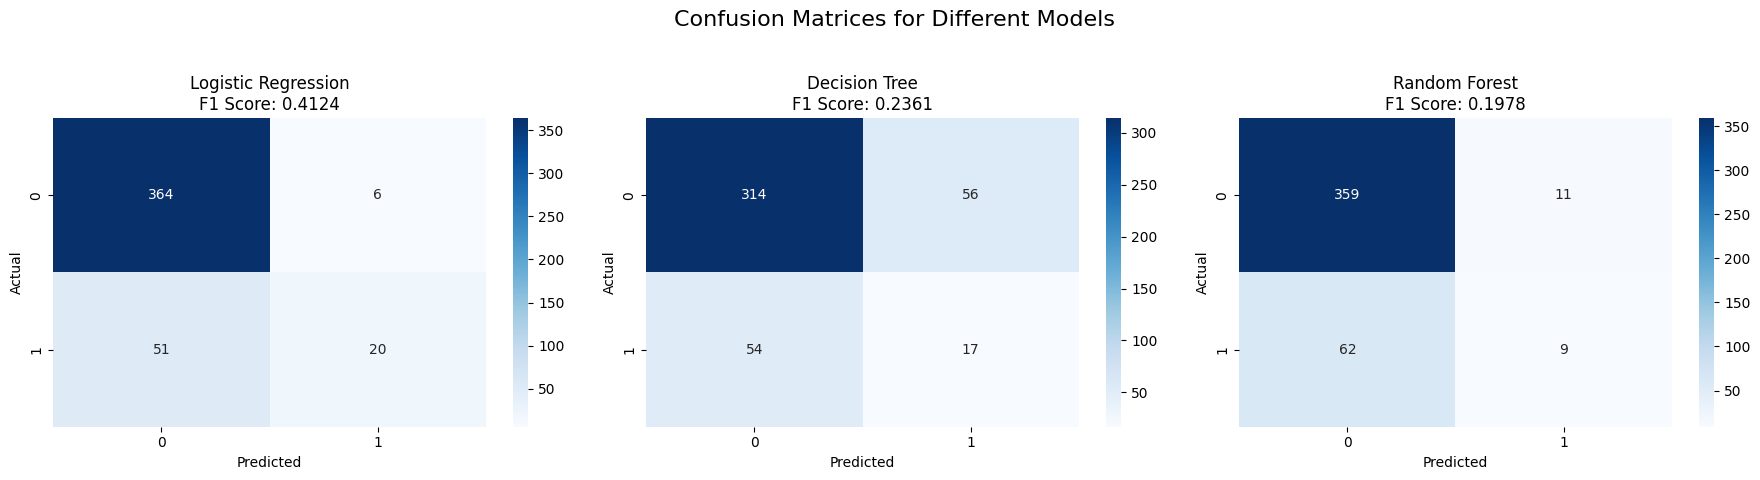

In [174]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices for Different Models', fontsize=16)

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}\nF1 Score: {f1:.4f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Getting the classification report using the ```classification_report``` from scikit-learn

In [176]:

print("\nClassification Reports:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n {name} ")
    print(classification_report(y_test, y_pred))



Classification Reports:

 Logistic Regression 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.77      0.28      0.41        71

    accuracy                           0.87       441
   macro avg       0.82      0.63      0.67       441
weighted avg       0.86      0.87      0.84       441


 Decision Tree 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       370
           1       0.23      0.24      0.24        71

    accuracy                           0.75       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.75      0.75      0.75       441


 Random Forest 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.45      0.13      0.20        71

    accuracy                           0.83       441
   macro avg       0.65      0.55      0.55   

Feature Importance Visualization (for Random Forest)
Finally we can visualize what features were important for Random Forest

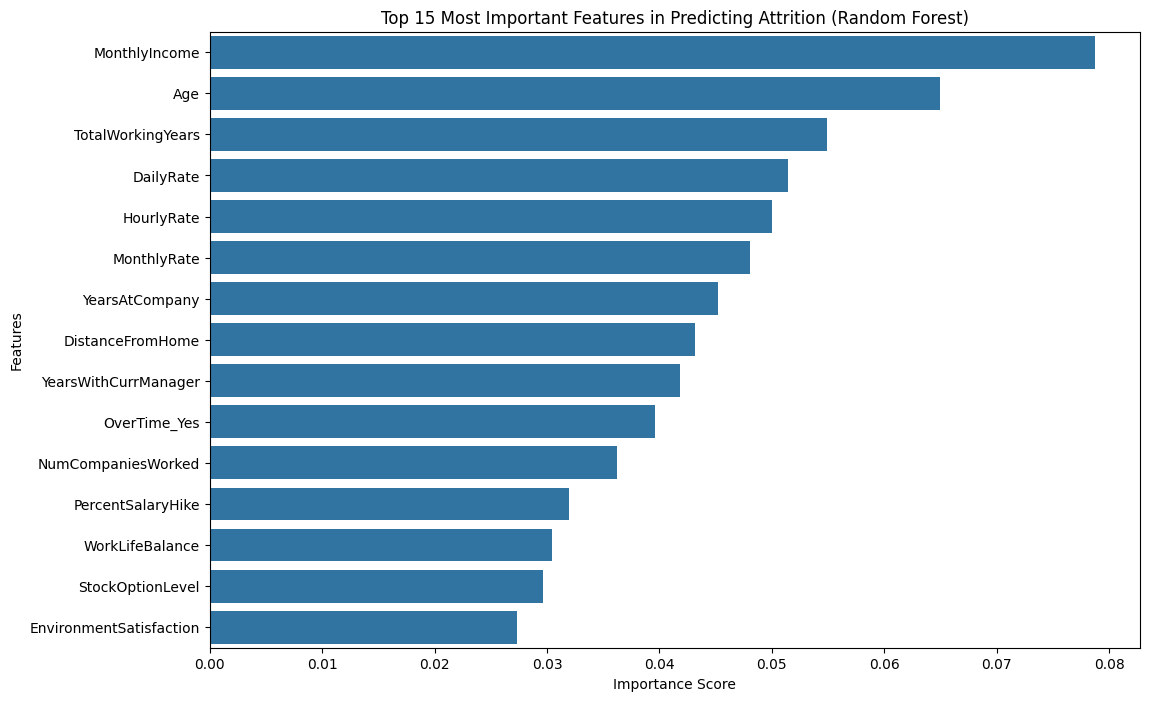

In [177]:

rf_model = models["Random Forest"]
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Get the top 15 features
top_15_features = feature_importances.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_features.importance, y=top_15_features.index)
plt.title('Top 15 Most Important Features in Predicting Attrition (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Conclusion

The evaluation highlights contrasting performances across the three classification models: Logistic Regression, Decision Tree, and Random Forest. Logistic Regression demonstrated the strongest overall performance metrics, achieving the highest Accuracy at 0.87 and the best Macro F1-score of 0.67. This success is attributed to its linear nature, which effectively models the majority non-attrition class with a very high recall of 0.98. However, its limitation became apparent with the minority attrition class, where the recall dropped significantly to 0.28, a common issue when linear models encounter complex, imbalanced data structures.

In contrast, the tree-based models struggled differently. The Decision Tree exhibited the lowest overall Accuracy (0.75) and Macro F1 (0.54), suggesting it may have overfit the training data by creating overly specific rules, failing to generalize well to unseen attrition cases. The Random Forest, an ensemble method, showed better stability, yielding an Accuracy of 0.83 and a Macro F1 of 0.55, yet it still strongly favored the majority class, resulting in an extremely low recall of 0.13 for the critical attrition class. This indicates that while it generalized better than a single tree, the fundamental class imbalance suppressed its ability to correctly identify employees who actually leave.

Comparing the results, Logistic Regression currently emerges as the better model due to its superior overall accuracy and Macro F1 score, suggesting the best balance between correct classifications across both classes as the data is currently distributed. Nonetheless, for a real-world attrition prediction system, the extremely poor recall for Class 1 in all models is the most pressing concern. The analysis concludes that while Logistic Regression is the current statistical winner, future improvements across all models must prioritize addressing the class imbalance using techniques like class_weight='balanced' or resampling methods to ensure the crucial minority class is identified effectively.